### Importação das bibliotecas 

In [118]:
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Leitura dos dados

In [40]:
df = pd.read_excel('dados.xlsx')
df

,coluna_1,coluna_2,coluna_3,coluna_4,coluna_5,coluna_6,coluna_7,coluna_8,coluna_9,coluna_10
0,161,162,163,163,163,164,165,165,165,166
1,166,166,167,167,167,168,168,168,168,168
2,169,169,169,169,169,170,170,170,170,170
3,171,171,171,172,172,172,172,173,173,174
4,174,174,175,175,175,176,176,176,177,177
5,178,179,179,180,180,181,182,184,187,188


## Perguntas 

### 1) Obtenha a média e o desvio padrão da amostra de dados

In [44]:
### Concatena todos os valores da planilha em uma única série 
dados = df.values.flatten()

In [45]:
dados = pd.Series(dados).dropna()

In [46]:
# Calcula média e desvio padrão da amostra 
media = dados.mean()

In [47]:
desvio_padrao_amostral = dados.std(ddof=1)

In [48]:
media, desvio_padrao_amostral

(171.65, 6.114237344516872)

### 2) Faça uma distribuição de frequência para os dados absoluta e relativas (simples e acumuladas) e os pontos médios;  

In [49]:
# Calcula os limites de classe usando o método de Sturges
num_classes = int(1 + 3.322 * np.log10(len(dados)))

In [50]:
# Cria a distribuição de frequência 
frequencia_absoluta, classes = np.histogram(dados, bins=num_classes) 
intervalos = pd.IntervalIndex.from_breaks(classes)

In [51]:
## Frequência relativa simples
frequencia_relativa = frequencia_absoluta / len(dados)

In [52]:
## Frequências acumuladas 
frequencia_absoluta_acumulada = np.cumsum(frequencia_absoluta) 
frequencia_relativa_acumulada = np.cumsum(frequencia_relativa)

In [53]:
## Pontos médios 
pontos_medios = [(interval.left + interval.right) / 2 for interval in intervalos]

In [54]:
## Monta o DataFrame 
tabela_freq = pd.DataFrame({
    
    "Classe": intervalos.astype(str), 
    "Ponto Médio": pontos_medios, 
    "Frequência Absoluta": frequencia_absoluta, 
    "Frequência Relativa (%)": np.round(frequencia_relativa * 100, 2),
    "Frequência Absoluta Acumulada": frequencia_absoluta_acumulada, 
    "Frequência Relativa Acumulada (%)": np.round(frequencia_relativa_acumulada * 100, 2)
})

In [55]:
tabela_freq

,Classe,Ponto Médio,Frequência Absoluta,Frequência Relativa (%),Frequência Absoluta Acumulada,Frequência Relativa Acumulada (%)
0,"(161.0, 165.5]",163.25,9,15.00,9,15.00
1,"(165.5, 170.0]",167.75,16,26.67,25,41.67
2,"(170.0, 174.5]",172.25,17,28.33,42,70.00
3,"(174.5, 179.0]",176.75,9,15.00,51,85.00
4,"(179.0, 183.5]",181.25,6,10.00,57,95.00
5,"(183.5, 188.0]",185.75,3,5.00,60,100.00


### 3) Construir os histogramas e os polígonos das frequências absolutas e relativas (simples e acumuladas); 

In [58]:
### Transformar todos os dados em uma única série 
valores = df.values.flatten()
serie = pd.Series(valores)

In [62]:
# Calcular frequências 
frequencia_absoluta = serie.value_counts().sort_index()
frequencia_relativa = frequencia_absoluta / frequencia_absoluta.sum() 
frequencia_absoluta_acumulada = frequencia_absoluta.cumsum()
frequencia_relativa_acumulada = frequencia_relativa.cumsum()

In [63]:
# Juntar em um DataFrame
tabela_frequencias = pd.DataFrame({
    
    'Frequência Absoluta': frequencia_absoluta, 
    'Frequência Relativa': frequencia_relativa, 
    'Frequência Absoluta Acumulada': frequencia_absoluta_acumulada, 
    'Frequência Relativa Acumulada': frequencia_relativa_acumulada
})

In [64]:
print(tabela_frequencias)

     Frequência Absoluta  Frequência Relativa  Frequência Absoluta Acumulada  \
161                    1             0.016667                              1   
162                    1             0.016667                              2   
163                    3             0.050000                              5   
164                    1             0.016667                              6   
165                    3             0.050000                              9   
166                    3             0.050000                             12   
167                    3             0.050000                             15   
168                    5             0.083333                             20   
169                    5             0.083333                             25   
170                    5             0.083333                             30   
171                    3             0.050000                             33   
172                    4             0.0

In [93]:
# Resetar o índice para usar os valores com categorias 
tabela_frequencias = tabela_frequencias.reset_index()
tabela_frequencias.rename(columns={'index': 'Classe'}, inplace=True)

In [120]:
## Definindo o estilo dos gráficos 
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

Text(0, 0.5, 'Frequência Absoluta')

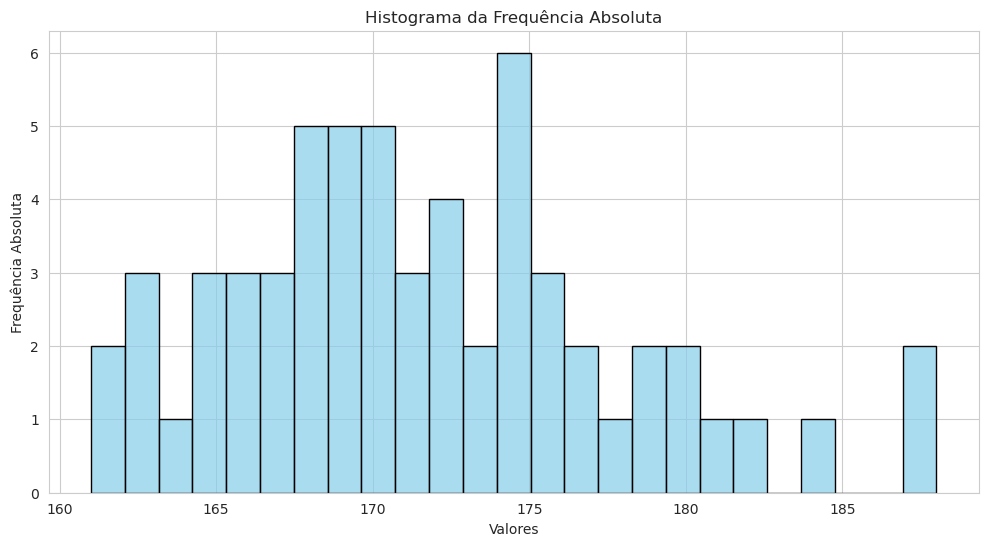

In [124]:
# 1. Histograma e Polígono de Frequência Absoluta
plt.figure(figsize=(12,6))

# Histograma da Frequência Absoluta 
sns.histplot(serie, bins=len(tabela_frequencias), kde=False, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma da Frequência Absoluta') 
plt.xlabel('Valores')
plt.ylabel('Frequência Absoluta')

Text(0, 0.5, 'Frequência Relativa')

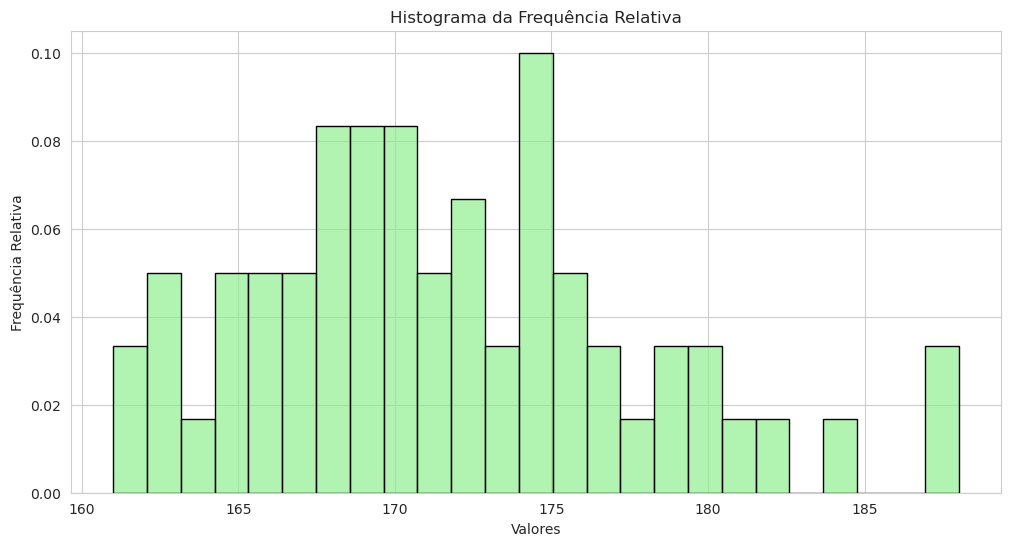

In [129]:
# Histograma da Frequência Relativa 
plt.figure(figsize=(12, 6))

# Histograma da Frequência Relativa
weights = [1./len(serie)] * len(serie) 
sns.histplot(serie, bins=len(tabela_frequencias), stat='probability', color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Histograma da Frequência Relativa') 
plt.xlabel('Valores')
plt.ylabel('Frequência Relativa')

### Polígonos

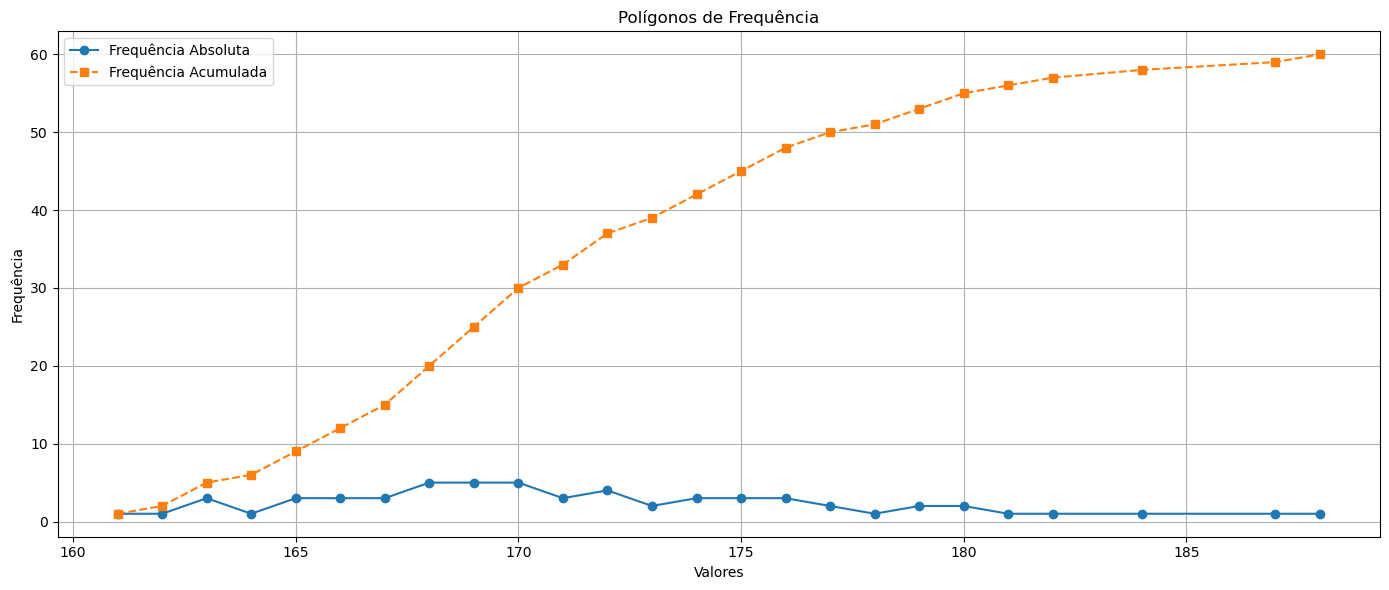

In [74]:
# ------------------
# Plot: Polígonos
# ------------------ 

plt.figure(figsize=(14,6))

# Polígono da frequência absoluta 
plt.plot(frequencia_absoluta.index, frequencia_absoluta.values, marker='o', linestyle='-', label='Frequência Absoluta') 

# Poligono da frequência acumulada 
plt.plot(frequencia_absoluta_acumulada.index, frequencia_absoluta_acumulada.values, marker='s', linestyle='--', label='Frequência Acumulada') 

plt.title('Polígonos de Frequência') 
plt.xlabel('Valores') 
plt.ylabel('Frequência') 
plt.legend() 
plt.grid(True) 

plt.tight_layout()
plt.show()

### 4) Quais percentuais da distribuição estão dentro de um e de dois desvio padrão da média? 

In [149]:
# Dados fornecidos (Ordenação dos dados)
dados = [
    161, 162, 163, 163, 163, 164, 165, 165, 165, 166,
    166, 166, 167, 167, 167, 168, 168, 168, 168, 168,
    169, 169, 169, 169, 169, 170, 170, 170, 170, 170,
    171, 171, 171, 172, 172, 172, 172, 173, 173, 174,
    174, 174, 175, 175, 175, 176, 176, 176, 177, 177,
    178, 179, 179, 180, 180, 181, 182, 184, 187, 188
]

In [151]:
# Cálculos estatísticos 
media = np.mean(dados) 
desvio = np.std(dados)

In [152]:
# Intervalos 
um_desvio_min = media - desvio 
um_desvio_max = media + desvio 
dois_desvios_min = media - 2 * desvio 
dois_desvios_max = media + 2 * desvio 

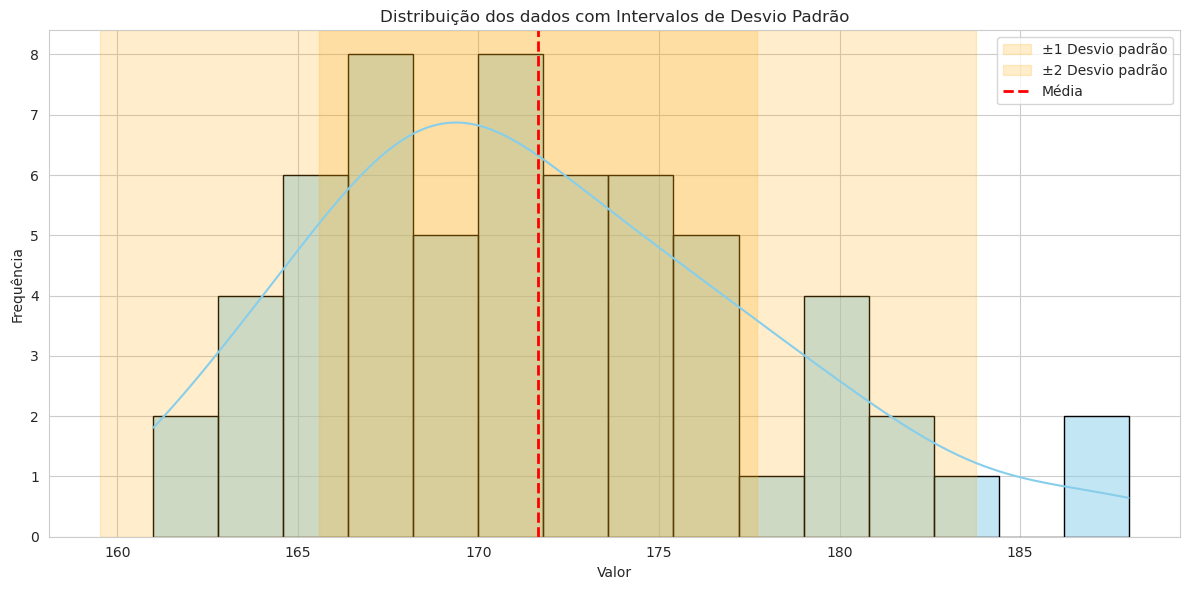

In [161]:
# Plot da distribuição 
plt.figure(figsize=(12,6))
sns.histplot(dados, bins=15, kde=True, color='skyblue', edgecolor='black')

# Sombras para 1 desvio padrão 
plt.axvspan(um_desvio_min, um_desvio_max, color='orange', alpha=0.2, label='±1 Desvio padrão') 

# Sombras para 2 desvios padrão 
plt.axvspan(dois_desvios_min, dois_desvios_max, color='orange', alpha=0.2, label='±2 Desvio padrão') 

# Linha da média 
plt.axvline(media, color='red', linestyle='--', linewidth=2, label='Média') 

# Rótulos e legenda 
plt.title('Distribuição dos dados com Intervalos de Desvio Padrão') 
plt.xlabel('Valor')
plt.ylabel('Frequência') 
plt.legend() 
plt.grid(True) 
plt.tight_layout()
plt.show()

### 5) Como esses resultados estão de acordo com a Regra Empírica ? 

In [166]:
### 1 - Preparar os dados para análise -- 
# Empilhar todas as colunas numéricas em uma única série 
# Isso é útil se seus dados estão espalhados por várias colunas 

dados_numeric = df.select_dtypes(include=np.number) 
todos_os_valores = dados_numeric.stack().reset_index(drop=True) 

# --- 2. Calcular Média e Desvio Padrão --- 
media = todos_os_valores.mean()
desvio_padrao = todos_os_valores.std()

print(f"Média dos dados: {media:.2f}")
print(f"Desvio Padrão dos dados: {desvio_padrao:.2f}\n")

Média dos dados: 171.65
Desvio Padrão dos dados: 6.11



In [167]:
# --- 3. Calcular os limites para 1 e 2 desvio Padrão --- 
# Limites para 1 desvio padrão 
limite_inf_1dp = media - desvio_padrao 
limite_sup_1dp = media + desvio_padrao 


In [168]:
# Limites para 2 desvios padrão 
limite_inf_2dp = media - (2 * desvio_padrao) 
limite_sup_2dp = media + (2 * desvio_padrao) 

In [169]:
# --- 4. Contar os dados dentro dos limites --- 
# Dados dentro de 1 desvio padrão 
dentro_1dp = todos_os_valores[
    
    (todos_os_valores >= limite_inf_1dp) & (todos_os_valores <= limite_sup_1dp)
]

percentual_1dp = (len(dentro_1dp) / (len(todos_os_valores)) * 100) 

In [173]:
# Dados dentro de 2 desvios padrão 
dentro_2dp = todos_os_valores[
    (todos_os_valores >= limite_inf_2dp) & (todos_os_valores <= limite_sup_2dp)
]

percentual_2dp = (len(dentro_2dp) / len(todos_os_valores)) * 100 

In [176]:
### 5. Apresentar os resultados  comparar com a Regra Empírica -- 
print("--- Análise da Distribuição ---") 
print(f"Percentual de dados dentro de 1 desvio padrão: {percentual_1dp:.2f}%")
print(f"Percentual de dados dentro de 2 desvios padrão: {percentual_2dp:.2f}%\n")

--- Análise da Distribuição ---
Percentual de dados dentro de 1 desvio padrão: 68.33%
Percentual de dados dentro de 2 desvios padrão: 95.00%



In [179]:
print("---Comparação com a Regra Empírica (68-95-99.7)")
print(f"Regra Empírica (1 desvio padrão): ~68%") 
print(f"Seus dados (1 desvio padrão): {percentual_1dp:.2f} %")

---Comparação com a Regra Empírica (68-95-99.7)
Regra Empírica (1 desvio padrão): ~68%
Seus dados (1 desvio padrão): 68.33 %


In [182]:
if percentual_1dp >= 67 and percentual_1dp <= 69: 
    
    print("-> Seus dados estão muito próximos do esperado pela Regra Empírica para 1 desvio padrão. ")

elif percentual_1dp > 69: 
    
    print("-> Seus dados têm um percentual ligeiramente maior dentro de 1 desvio padrão do que o esperado pela Regra Empírica. ")
    
else: 
    
    print("-> Seus dados têm um percentual ligeiramente menor dentro de 1 desvio padrão do que pela Regra Empírica.")
    
print(f"\nRegra Empírica (2 desvios padrão): ~95%") 
print(f"Seus dados (2 desvios padrão): {percentual_2dp:.2f}%")

-> Seus dados estão muito próximos do esperado pela Regra Empírica para 1 desvio padrão. 

Regra Empírica (2 desvios padrão): ~95%
Seus dados (2 desvios padrão): 95.00%


In [183]:
if percentual_2dp >= 94 and percentual_2dp <= 96: 
    
    print("-> Seus dados estão muito próximos do esperado pela Regra Empírica para 2 desvios padrão. ")
    
elif percentual_2dp > 96: 
    
    print("-> Seus dados têm um percentual ligeiramente maior dentro de 2 desvios padrãoes do que o esperado pela Regra Empírica.")
    
print("\n Conclusão: As pequenas variações em relação à Regra Empírica sugerem que seus dados podem não ser perfeitamente normais, mas são aproximadamente normais, o que é comun em dados reais")

-> Seus dados estão muito próximos do esperado pela Regra Empírica para 2 desvios padrão. 

 Conclusão: As pequenas variações em relação à Regra Empírica sugerem que seus dados podem não ser perfeitamente normais, mas são aproximadamente normais, o que é comun em dados reais


### 6) Classifique, quanto a assimetria e a curtose, a distribuição amostral das alturas desse grupo de pessoas; 

In [185]:
# Empilhar todas as colunas numéricas em única série 
dados_numeric = df.select_dtypes(include=np.number)

In [186]:
## Seleciona apenas colunas númericas 
todos_os_valores = dados_numeric.stack().reset_index(drop=True)

In [188]:
## Calcular Assimetria (Skewness) e Curtose (Kurtosis) --- 
assimetria = todos_os_valores.skew()
curtose = todos_os_valores.kurt() 

In [189]:
print(f"Assimetria (Skewness): {assimetria:.4f}") 
print(f"Curtose (Kurtosis, Excess): {curtose:.4f}\n")

Assimetria (Skewness): 0.6245
Curtose (Kurtosis, Excess): 0.1036



In [191]:
## Classificar a Assimetria 
print("--- Classificação da Assimetria ---") 

if assimetria > 0.5: 
    
    print(f"A distribuição é assimétrica ** positiva (à direita)**. Isso significa que a cauda direita é mais longa ou mais 'pesada', e a maioria dos dados está concentrada nos valores mais baixos, com alguns valores extremos altos puxando a média para cima")
    
elif assimetria < -0.5: 
    
    print(f"A distribuição é assimétrica ** negativa (à esquerda)**. Isso significa que a cauda esquerda é mais longa ou mais 'pesada', e a maioria dos dados está concentrada nos valores mais altos, com alguns valores extremos baixos puxando a média para baixo")
    
elif -0.5 <= assimetria <= 0.5: 
    
    print(f"Assismetria: {assimetria: .4f}. Interpretação adicional pode ser necessária. ")
    

--- Classificação da Assimetria ---
A distribuição é assimétrica ** positiva (à direita)**. Isso significa que a cauda direita é mais longa ou mais 'pesada', e a maioria dos dados está concentrada nos valores mais baixos, com alguns valores extremos altos puxando a média para cima


In [192]:
### Classificar a Curtose 
print("\n --- Classificação da Curtose ---") 

if curtose > 1: 
    
    print(f"A distribuição é ** Leptocúrtica **. Isso significa que a distribuição tem um pico mais alto e caudas mais pesadas (mais valores extremos) do que uma distribuição normal. Há maior concentração de dados em torno da média e mais outliers")
    
elif curtose < -1: 
    
    print(f"A distribuição é ** platicúrtica **. Isso signfica que a distribuição tem um pico mais baixo e caudas mais leves (menos valores extremos) do que uma distribuição normal. Os dados estão mais dispersos e têm uma variação menor na frequência dos valores extremos.")

elif -1 <= curtose <= 1: 
    
    print(f"Curtose: {curtose:.4f}. Interpretação adicional pode ser necessária.")


 --- Classificação da Curtose ---
Curtose: 0.1036. Interpretação adicional pode ser necessária.


In [193]:
## Resumo 
print(f"Com base nos calcúlos, a distribuição das alturas é classificada como: ") 
print(f" - Assimetria: {'Positiva (à direita)' if assimetria > 0.5 else 'Negativa (a esquerda)' if assimetria < -0.5 else 'Aproximadamente Simétrica'}") 
print(f"- Curtose: {'Leptocúrtica' if curtose > 1 else 'Platicúrtica' if curtose < -1 else 'Mesocúrtica'}")


Com base nos calcúlos, a distribuição das alturas é classificada como: 
 - Assimetria: Positiva (à direita)
- Curtose: Mesocúrtica
